In [2]:
# Load our word2vec model
import gensim
w2v_model = gensim.models.word2vec.Word2Vec.load("word2vec_model_trained_on_Health_and_Personal_Care_5.w2v")
print("Model loaded")

Model loaded


In [5]:
pip install gensim --upgrade

Requirement already up-to-date: gensim in c:\users\i5\anaconda3\lib\site-packages (4.0.1)
Note: you may need to restart the kernel to use updated packages.


In [31]:
#Select 10000 words from our vocabulary
from __future__ import absolute_import, division, print_function
import numpy as np
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float64')
word_list = []
i = 0
for word in w2v_model.wv.vocab:
    word_vectors_matrix[i] = w2v_model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (10000, 300)


<ipython-input-31-96c25bc13e12>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_vectors_matrix[i] = w2v_model[word]


In [7]:
#Compress the word vectors into 2D space
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (10000, 2)


In [8]:
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")

Points DataFrame built


In [9]:
points.head(10)

,word,x,y
0,This,-49.789814,18.799246
1,is,-56.428677,16.785244
2,a,-55.728500,19.222803
3,great,-60.455582,17.625988
4,little,-62.821911,17.076048
5,gadget,23.691933,-15.820797
6,to,-69.561127,12.114349
7,have,-61.097656,32.288155
8,around,-65.937836,7.161964
9,We,-64.031242,27.918402


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster")

<AxesSubplot:xlabel='x', ylabel='y'>

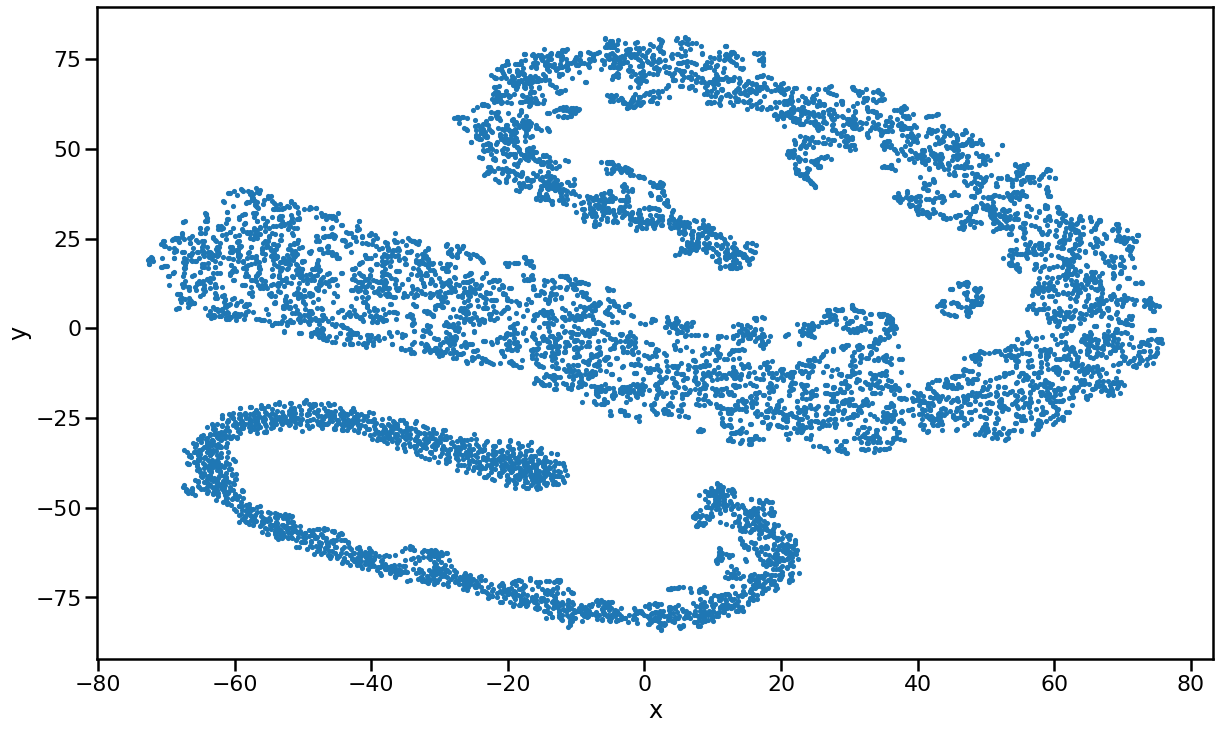

In [11]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [12]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1]) 
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

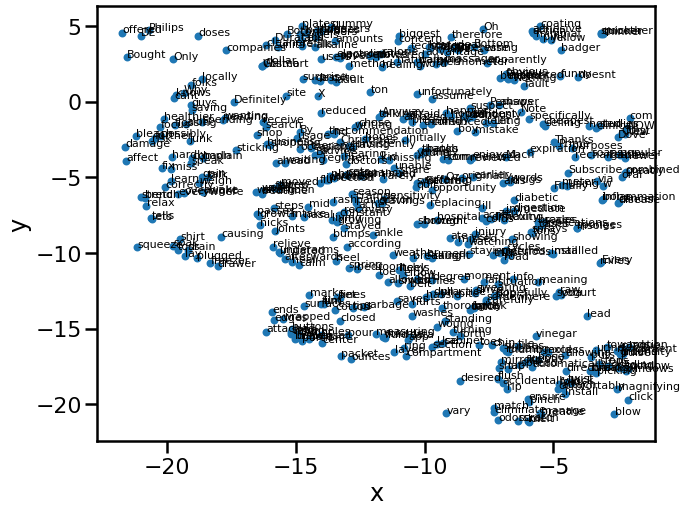

In [33]:
plot_region(x_bounds=(-22, -2.0), y_bounds=(-22,5, -2))

In [34]:
w2v_model.wv.most_similar("blue")

[('black', 0.9982325434684753),
 ('metal', 0.9969608783721924),
 ('lens', 0.9955326318740845),
 ('attachments', 0.9954519271850586),
 ('rubber', 0.9952420592308044),
 ('attachment', 0.9948787689208984),
 ('holder', 0.9948709607124329),
 ('cord', 0.9948263764381409),
 ('foam', 0.9942793846130371),
 ('strap', 0.994117259979248)]